# Working with Internal Representations

In [1]:
from pymbolic import parse

x = parse("x")
h = parse("h")

## Visualizing an Expression Tree

In [2]:
u = (x+4)**3

h = parse("h")

expr = u + 2*u*h + 4*u*h**2


In [3]:
# Load an IPython extension for graph drawing
%load_ext gvmagic

In [4]:
from pymbolic.mapper.graphviz import GraphvizMapper

gvm = GraphvizMapper()
gvm(expr)

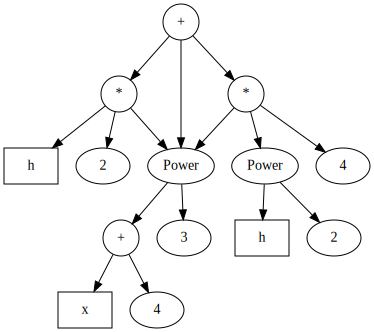

In [5]:
%dotstr gvm.get_dot_code()

## Serialization

The need may arise to store expressions on disk, likely as part of larger problem descriptions. One particular application of this might be caching. To do so, one can simply use Python's built-in 'pickle' mechanism:

In [6]:
import pickle

expr_data = pickle.dumps(expr)

print(type(expr_data), len(expr_data))

expr2 = pickle.loads(expr_data)

print(expr2 == expr)
print(expr2 is expr)

<class 'bytes'> 238
True
False


## Caching

Some operations on expression data (such as an entire compilation down to an OpenCL binary) may be somewhat expensive, which often makes caching a worthwhile investment. In principle, a Python dictionary is all that is needed, because the expression types that have been demonstrated are immutable and support hashing, and therefore work seamlessly with Python's set and dictionary types.

In connection with caches, one important question that needs to be answered is cache lifetime. In the example below, this is answered by attaching the lifetime of the cash to the lifetime of a containing object:

In [16]:

from pytools import memoize_method

class ExpressionCompiler:
    @memoize_method
    def compile(self, expr):
        print("compiling...")
        from time import sleep
        sleep(1.5)

        from pymbolic.mapper.c_code import CCodeMapper
        ccm = CCodeMapper()
        return ccm(expr)

(`pytools` is a supporting package that `pymbolic` depends on.)

In [21]:
ec = ExpressionCompiler()

ec.compile(expr)

compiling...


'pow(x + 4, 3) + 4 * pow(x + 4, 3) * h * h + 2 * pow(x + 4, 3) * h'

In [22]:
ec.compile(expr)

'pow(x + 4, 3) + 4 * pow(x + 4, 3) * h * h + 2 * pow(x + 4, 3) * h'